In [1]:
# Sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드.
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

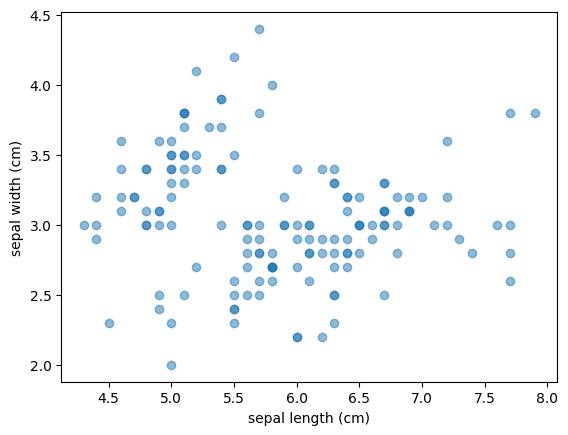

In [4]:
# sepal Length와 width 두 가지 feature만을 사용하도록 하겠음
# 데이터로부터 두 feature만을 뽑아내어 산점도를 그려 봄(x축-Length, y축-width)
from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)
#alpha - 색상의 투명도 지정(0-완전투명, 1-불투명)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [5]:
import numpy as np
k= 3

centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

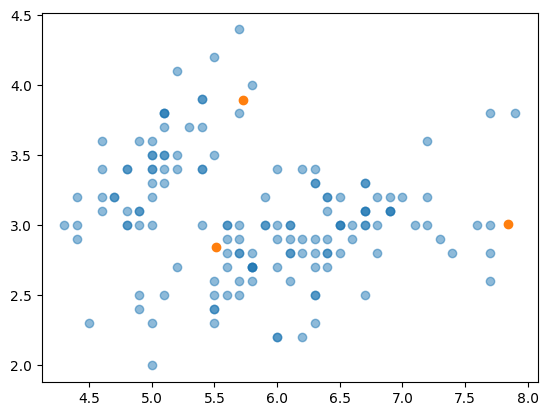

In [7]:
plt.scatter(x, y , alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

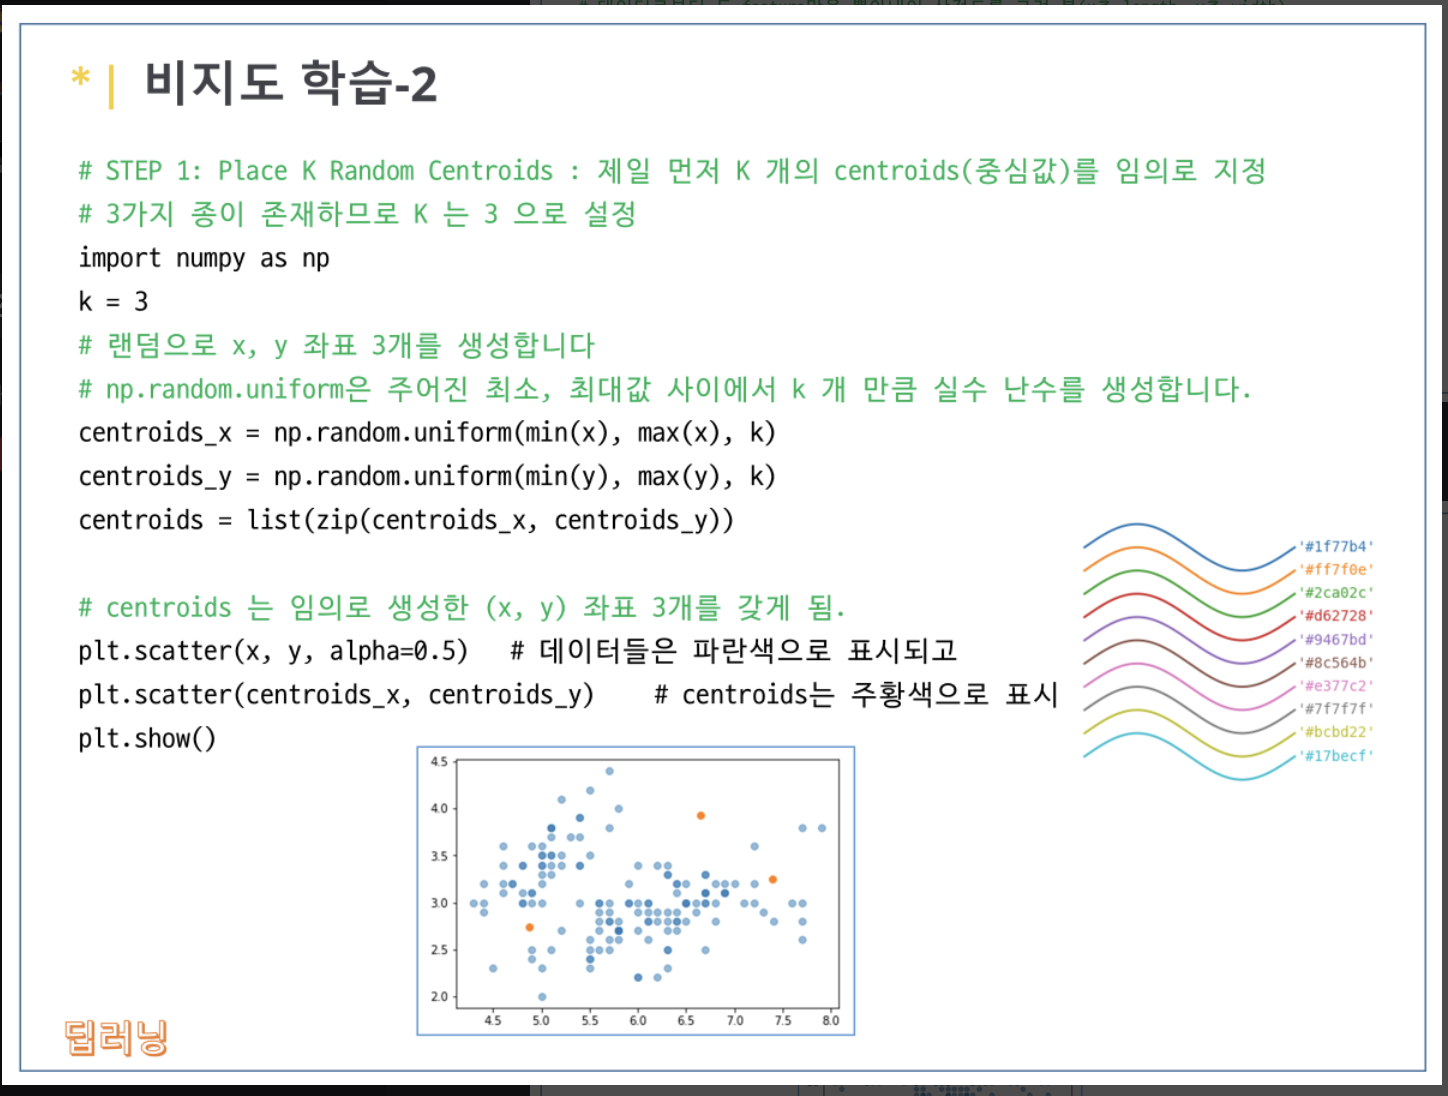

In [8]:
def distance(a, b):
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))])**0.5

labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))

In [10]:
for i in range(len(samples)):
    distances = np.zeros(k)
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)
    labels[i] = cluster

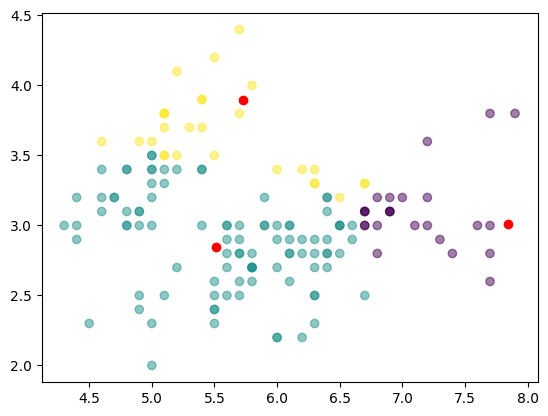

In [11]:
plt.scatter(x, y, c=labels, alpha=0.5
            )
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

In [12]:
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

In [13]:
print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

[array([7.128, 3.1  ]), array([5.58865979, 2.87525773]), array([5.57857143, 3.65      ])]
<class 'list'>
[(7.847356796956381, 3.0109824614555025), (5.508741788193316, 2.8483067287067363), (5.7309762068756, 3.8983246775074676)]
<class 'list'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


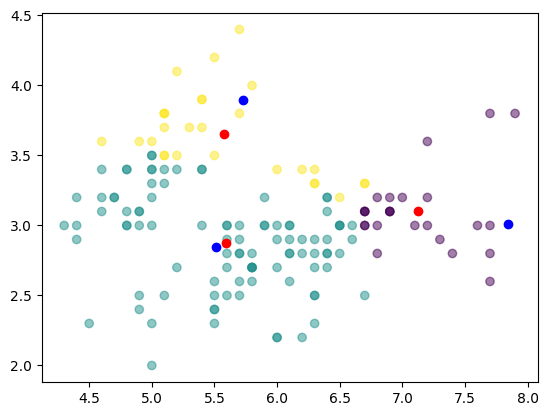

In [14]:
centroids= np.array(centroids)
centroids_old= np.array(centroids_old)
print(type(centroids))
print (type(centroids_old))
#기존 centroids_old 와 centroids 위치 비교
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue') 
plt.show()

빠진 부분

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'sepal width (cm)')

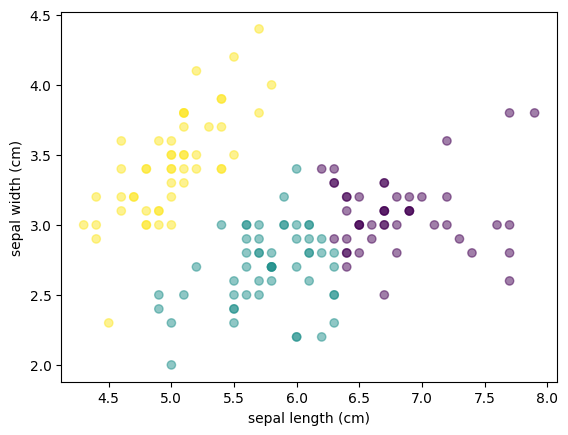

In [16]:
import matplotlib.pyplot as plt 
from sklearn import datasets
#skLearn 라이브러리의 cluster 모듈에는 K-Means를 구현할 수 있는 KMeans 를 제공
from sklearn.cluster import KMeans
iris = datasets.load_iris()
samples = iris.data[:, 0:2]
# 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
model = KMeans(n_clusters = 3) #k를 지정해 주어야 함 #fit() 메서드를 통해 KMean 클러스터링을 수행.
model.fit (samples)
#K-Means를 수행한 다음,.predict() 메서드를 통해 unlabeled 데이터를 그룹에 할당
labels = model.predict(samples)
# 클러스터링 결과를 시각화합니다
x = samples[:, 0]
y = samples[:, 1]
plt.scatter (x, y, c=labels, alpha=0.5) 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
pl

In [19]:
target = iris.target
#문자열 배열을 생성시킴
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
    if target[i] == 0:
        species [i] = 'setosa'
    elif target[1] == 1:
        species[i] = 'versicolor'
    elif target[i] == 2:
        species[i] = 'virginica'
# 다음으로 cross-tabulation 을 통해 결과를 분석 # Pandas 라이브러리를 활용하면 이를 쉽게 구현 할 수 있음.
import pandas as pd
# Labels : 비지도 학습 데이터 # species : 원 데이터
df = pd.DataFrame({ 'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])


In [20]:
print(ct)

species  b''  b'setosa'  b'virginica'
labels                               
0         12          0            35
1         38          0            15
2          0         50             0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

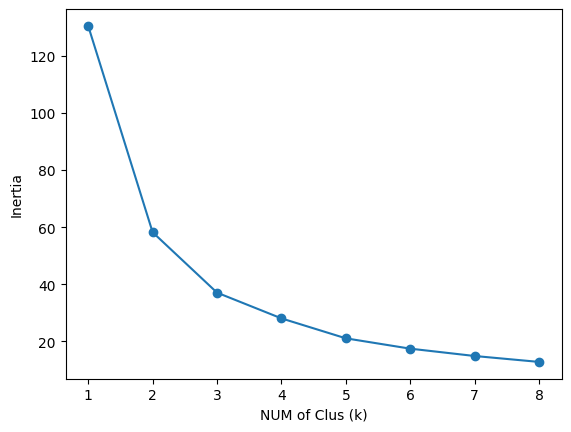

In [22]:
num_clusters = list(range(1, 9))
inertias = []

for i in num_clusters:
    model=KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel("NUM of Clus (k)")
plt.ylabel('Inertia')
plt.show()